# Lab Result Prediction

Ensure you install missing libraries

In [2]:
pip install seaborn

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read in the csv file into pandas dataframe

In [6]:
data = pd.read_csv("healthcare_dataset.csv")

C:\Users\Dell\AppData\Local\Temp\ipykernel_1340\2189880621.py:1: DtypeWarning: Columns (16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("healthcare_dataset.csv")


### Data Exploration begins

In [7]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,BloodPressure,SkinThickness,Insulin,Id
0,Bobby JacksOn,30.0,Male,B-,Cancer,31/01/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,...,True,False,False,False,False,True,72.0,35.0,0.0,1
1,LesLie TErRy,62.0,Male,A+,Obesity,20/08/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,...,False,False,False,False,False,True,66.0,29.0,0.0,2
2,DaNnY sMitH,76.0,Female,A-,Obesity,22/09/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,...,False,False,False,False,False,True,64.0,0.0,0.0,3
3,andrEw waTtS,28.0,Female,O+,Diabetes,18/11/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,...,False,False,False,False,False,True,66.0,23.0,94.0,4
4,adrIENNE bEll,43.0,Female,AB+,Cancer,19/09/2022,Kathleen Hanna,White-White,Aetna,14238.31781,...,True,True,False,False,False,True,40.0,35.0,168.0,5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55781 entries, 0 to 55780
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55631 non-null  float64
 2   Gender              55750 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55760 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55636 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55722 non-null  object 
 9   Billing Amount      55628 non-null  float64
 10  Room Number         55500 non-null  float64
 11  Admission Type      55645 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55626 non-null  object 
 14  Test Results        55500 non-null  object 
 15  Neighbourhood       55760 non-null  object 
 16  Scho

In [9]:
data.describe()

,Age,Billing Amount,Room Number,BloodPressure,SkinThickness,Insulin
count,55631.000000,55628.000000,55500.000000,2768.000000,2768.000000,2768.000000
mean,51.501195,25540.297749,301.134829,69.134393,20.824422,80.127890
std,19.624697,14211.206153,115.243069,19.231438,16.059596,112.301933
min,1.000000,-2008.492140,101.000000,0.000000,0.000000,0.000000
25%,35.000000,13244.433940,202.000000,62.000000,0.000000,0.000000
50%,52.000000,25534.247265,302.000000,72.000000,23.000000,37.000000
75%,68.000000,37818.595893,401.000000,80.000000,32.000000,130.000000
max,89.000000,58125.993410,500.000000,122.000000,110.000000,846.000000


Checking Null Values

In [10]:
data.isna().sum()

Name                    281
Age                     150
Gender                   31
Blood Type              281
Medical Condition        21
Date of Admission       281
Doctor                  145
Hospital                281
Insurance Provider       59
Billing Amount          153
Room Number             281
Admission Type          136
Discharge Date          281
Medication              155
Test Results            281
Neighbourhood            21
Scholarship              21
Hipertension             21
Diabetes                 21
Alcoholism               21
Handcap                  21
SMS_received             21
Showed_up                21
BloodPressure         53013
SkinThickness         53013
Insulin               53013
Id                    27344
dtype: int64

See duplicates

In [11]:
duplicates = data[data.duplicated()]
duplicates

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,BloodPressure,SkinThickness,Insulin,Id
55774,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55775,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55776,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55777,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55778,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55779,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55780,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55774 entries, 0 to 55773
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55631 non-null  float64
 2   Gender              55743 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55760 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55636 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55722 non-null  object 
 9   Billing Amount      55628 non-null  float64
 10  Room Number         55500 non-null  float64
 11  Admission Type      55645 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55626 non-null  object 
 14  Test Results        55500 non-null  object 
 15  Neighbourhood       55760 non-null  object 
 16  Scholarsh

## Data Visualization

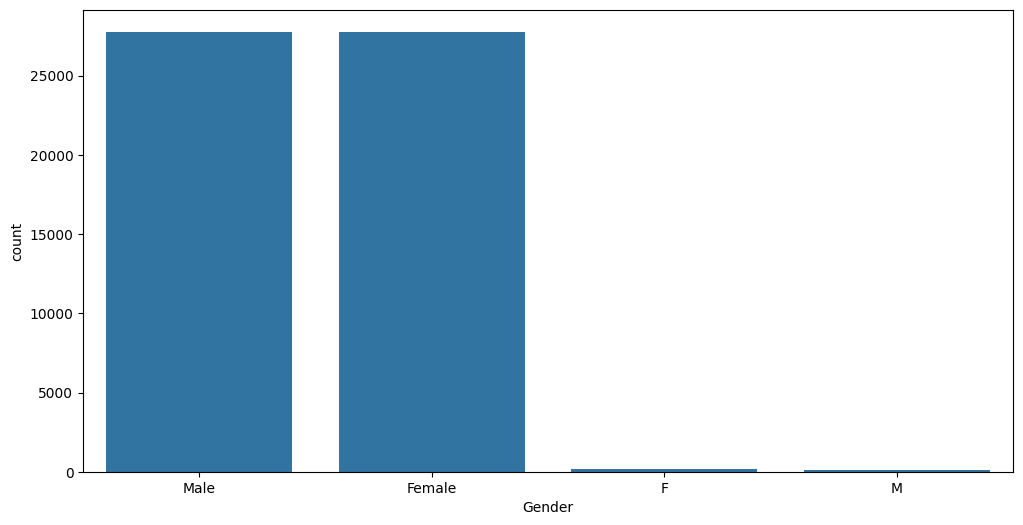

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Gender', data=data)
plt.show()

Gender has some F/M instead of Male and Female throughout.So we will change them appropriately 

In [15]:
# Replace 'F' with 'Female' and 'M' with 'Male' in the 'Gender' column
data['Gender'] = data['Gender'].replace({'F': 'Female', 'M': 'Male'})

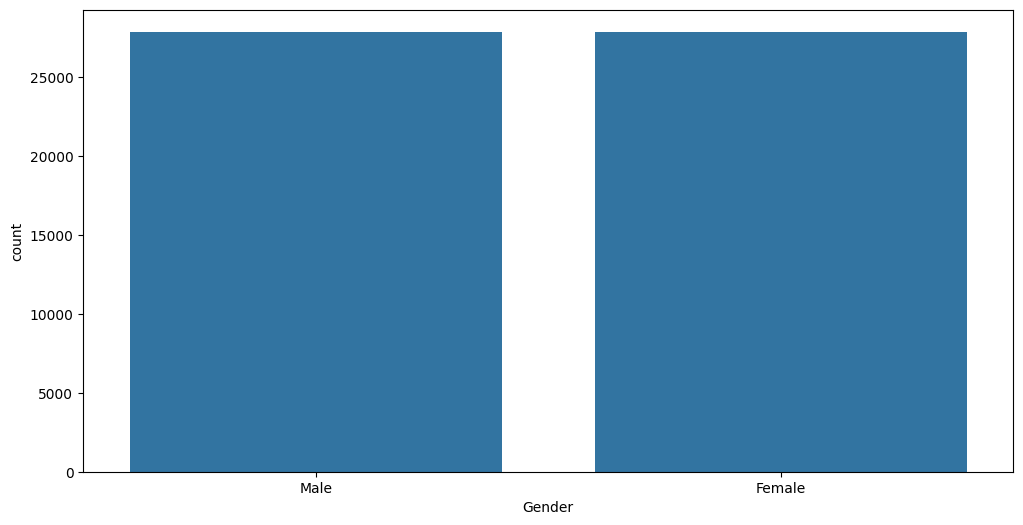

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Gender', data=data)
plt.show()

### Data Wrangling

Lets make the patients names to use title case instead of the present camel case

In [21]:
data["Name"] = data['Name'].str.title()

In [22]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,...,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,BloodPressure,SkinThickness,Insulin,Id
0,Bobby Jackson,30.0,Male,B-,Cancer,31/01/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,...,True,False,False,False,False,True,72.0,35.0,0.0,1
1,Leslie Terry,62.0,Male,A+,Obesity,20/08/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,...,False,False,False,False,False,True,66.0,29.0,0.0,2
2,Danny Smith,76.0,Female,A-,Obesity,22/09/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,...,False,False,False,False,False,True,64.0,0.0,0.0,3
3,Andrew Watts,28.0,Female,O+,Diabetes,18/11/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,...,False,False,False,False,False,True,66.0,23.0,94.0,4
4,Adrienne Bell,43.0,Female,AB+,Cancer,19/09/2022,Kathleen Hanna,White-White,Aetna,14238.31781,...,True,True,False,False,False,True,40.0,35.0,168.0,5
